In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
fdt = pd.read_csv('iris.csv')
#where fdt = flower dataset

In [3]:
print(fdt)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

In [5]:
len(fdt)

150

In [4]:
fdt.shape

(150, 5)

In [6]:
fdt[29:120]

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.1,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
37,4.9,3.1,1.5,0.1,setosa
38,4.4,3.0,1.3,0.2,setosa


In [7]:
fdt.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
fdt.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
sl = fdt['sepal_length']
np_sl = np.array(sl)

In [10]:
sw = fdt['sepal_width']
np_sw = np.array(sw)

In [11]:
labels = np.array(fdt['species'])

In [12]:
np_sw

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

Text(0.5, 1.0, 'iris jargons')

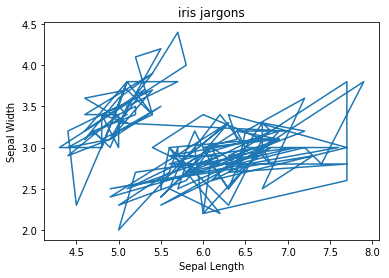

In [13]:
plt.plot(np_sl,np_sw)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('iris jargons')
#this shows it scattered and interconnected

Text(0, 0.5, 'Sepal Width')

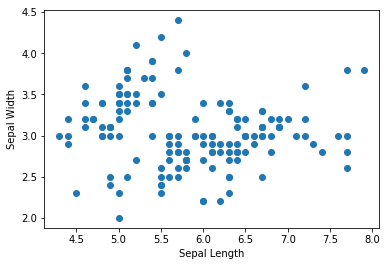

In [14]:
plt.plot(np_sl,np_sw, 'o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
#used to show distinct values that are not interconnected.

In [15]:
#to show classes with different colours, we check the number of classes available and assign colours to each of them.
fdt
#therefore, we have 'setosa','versicolor','virginica'

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Text(0, 0.5, 'Malaria Predictions')

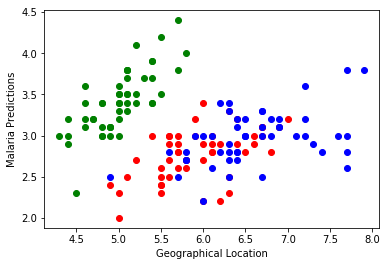

In [16]:
plt.plot(np_sl[labels == 'versicolor'] ,np_sw[labels == 'versicolor'], 'ro')
plt.plot(np_sl[labels == 'setosa'] ,np_sw[labels == 'setosa'], 'go')
plt.plot(np_sl[labels == 'virginica'] ,np_sw[labels == 'virginica'], 'bo')
plt.xlabel('Geographical Location')
plt.ylabel('Malaria Predictions')

In [18]:
#visualizing data in a single function.

In [19]:
def visualize_data(fdt):
    sl = fdt['sepal_length']
    np_sl = np.array(sl)
    sw = fdt['sepal_width']
    np_sw = np.array(sw)
    labels = np.array(fdt['species'])
    plt.plot(np_sl[labels == 'versicolor'] ,np_sw[labels == 'versicolor'], 'ro')
    plt.plot(np_sl[labels == 'setosa'] ,np_sw[labels == 'setosa'], 'go')
    plt.plot(np_sl[labels == 'virginica'] ,np_sw[labels == 'virginica'], 'bo')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Iris Data')
    

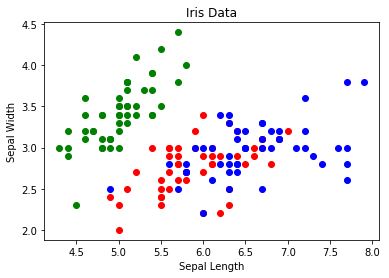

In [20]:
visualize_data(fdt)

In [21]:
#after importing sklearn, we define our classifier
#fitting our classifier into our dataset
#note, when fitting, the dataset could be divided into labels and features therefore, we should seperate the features fron the labels before passing it into the fit function seperately.
# the features comes from the first 4 columns of the datset
# species is the label
clf = svm.SVC(gamma='scale')
X = np.array(fdt[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
Y = np.array(fdt['species']) 
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
# seperate your dataset into a test and training dataset.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
#train ur classifier
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
#to get the prediction, we could usethe following
Y_pred = clf.predict(X_test)

In [24]:
#to get accuracy score,
accuracy_score(Y_test, Y_pred)
#our model is 100% accurate.

1.0

In [25]:
#to know the size of our training data, we use
X_train.shape

(105, 4)

In [26]:
X_test.shape

(45, 4)